In [29]:
data_dim_str = "T24H-X850M-Y880M"  # needs to exist
data_path = f"./data/processed/{data_dim_str}/"    


conf_dict = {
    "seed":3,
    "resume":False,
    "early_stopping":False,
    "use_weighted_sampler":True,
    "use_cuda":False,
    "val_ratio":0.1,
    "tst_ratio":0.2,
    "lr":1e-3,
    "weight_decay":1e-8,
    "max_epochs":10,
    "batch_size":80,
    "shuffle":False,
    "num_workers":6,
    "seq_len":0,
}

conf = BaseConf(conf_dict=conf_dict)

In [30]:
datagroup = CrimeDataGroup(data_path=data_path, conf=conf)

In [ ]:
datagroup.training_set

In [4]:
zip_file = np.load(data_path + "generated_data.npz")
for k,v in zip_file.items():
    print(f"{k} shape {np.shape(v)}")
    
t_range = pd.read_pickle(data_path + "t_range.pkl")    
print(f"t_range shape {np.shape(t_range)}")

crime_feature_indices shape (11,)
crime_types_grids shape (365, 11, 47, 33)
crime_grids shape (365, 1, 47, 33)
demog_grid shape (1, 37, 47, 33)
street_grid shape (1, 512, 47, 33)
time_vectors shape (366, 43)
weather_vectors shape (365, 11)
x_range shape (33,)
y_range shape (47,)
t_range shape (366,)


In [23]:
time_vectors.shape

(366, 43)

In [27]:
time_vectors = zip_file["time_vectors"]
time_vectors.max(0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

### testing data structure and folding

In [ ]:
import numpy as np
# use as index testing

shape = n,c,h,w = 100,3,12,11

flat_list = []
for t in range(n):
    for y in range(h):
        for x in range(w):
            flat_list.append([t,y,x])
            
            
flat_arr = np.array(flat_list)
arr = np.reshape(flat_arr,newshape=shape)


t,y,x = 34,6,7

index = np.ravel_multi_index(multi_index=(t,y,x), dims=(n,h,w))
np.unravel_index(index,shape=(n,h,w))


# Todo `AUC` over time and if re-training is needed

In [ ]:
np.stack()

### sub_sampling time dataframes

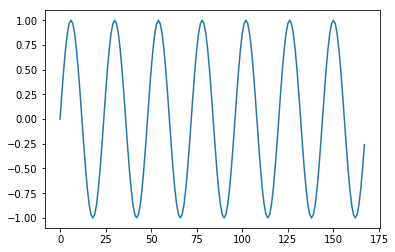

In [36]:
T = 24
f = 1/f
x = np.arange(T*7)
y = np.sin(2*np.pi*x*f)
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.show()